In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
# Read Text File
dataset = pd.read_csv('/content/Amazon Reviews_train.ft.txt',sep='\t',names=['Review'])

In [3]:
#First glance of the data
dataset.head()

# In this case, the classes are __label__1 and __label__2, and there is only one class per row.

# __label__1 corresponds to 1- and 2-star reviews, and __label__2 corresponds to 4- and 5-star reviews.

# (3-star reviews i.e. reviews with neutral sentiment were not included in the original),

# The review titles, followed by ':' and a space, are prepended to the text.


,Review
0,__label__2 Stuning even for the non-gamer: Thi...
1,__label__2 The best soundtrack ever to anythin...
2,__label__2 Amazing!: This soundtrack is my fav...
3,__label__2 Excellent Soundtrack: I truly like ...
4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


In [4]:
# Split review tile
data_processed = dataset['Review'].str.split(':',n=1,expand=True)
data_processed.columns = ['Title','Review']
data_processed.head()

,Title,Review
0,__label__2 Stuning even for the non-gamer,This sound track was beautiful! It paints the...
1,__label__2 The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...
2,__label__2 Amazing!,This soundtrack is my favorite music of all t...
3,__label__2 Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...
4,"__label__2 Remember, Pull Your Jaw Off The Flo...","If you've played the game, you know how divin..."


In [5]:
# __label__1 corresponds to 1- and 2-star reviews, and __label__2 corresponds to 4- and 5-star reviews.

# So categorise label1 to Bad and label2 to Good

data_processed['Category'] = ['Bad' if '1' in title else 'Good' for title in data_processed['Title']]

data_processed.head()

,Title,Review,Category
0,__label__2 Stuning even for the non-gamer,This sound track was beautiful! It paints the...,Good
1,__label__2 The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...,Good
2,__label__2 Amazing!,This soundtrack is my favorite music of all t...,Good
3,__label__2 Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...,Good
4,"__label__2 Remember, Pull Your Jaw Off The Flo...","If you've played the game, you know how divin...",Good


In [6]:
# Check Bad review

data_processed[data_processed['Category'] == 'Bad']

,Title,Review,Category
6,__label__1 Buyer beware,"This is a self-published book, and if you wan...",Bad
10,__label__1 The Worst!,A complete waste of time. Typographical error...,Bad
13,__label__1 Oh please,I guess you have to be a romance novel lover ...,Bad
14,__label__1 Awful beyond belief!,I feel I have to write to keep others from wa...,Bad
15,__label__1 Don't try to fool us with fake revi...,It's glaringly obvious that all of the glowin...,Bad
...,...,...,...
95127,__label__1 Useless with weak magnets.,I bought the utensil holder and the magnetic ...,Bad
95129,__label__1 Sliding hold,Ok..if I had read the reviews I would not hav...,Bad
95130,__label__1 Two cloth aprons are too much for it.,Looks great. The construction seems good too....,Bad
95135,__label__1 Most Likely Not What You're Looking...,This set of magnetic hooks will not work on t...,Bad


In [7]:
import nltk
from nltk.corpus import stopwords

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopwords = stopwords.words('english')

In [10]:
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
corpus = []
for i in range(0,len(data_processed['Review'])):
  review = data_processed['Review'][i]
  review = review.lower()
  review = review.split()

  review = [word for word in review if not word in stopwords ]
  review = ' '.join(review)
  corpus.append(review)

In [11]:
corpus[0]

'sound track beautiful! paints senery mind well would recomend even people hate vid. game music! played game chrono cross games ever played best music! backs away crude keyboarding takes fresher step grate guitars soulful orchestras. would impress anyone cares listen! ^_^'

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [13]:
# Initialise tokenizer and vocal size 3000

tokenizer = Tokenizer(num_words=3000,oov_token='OOV')

In [14]:
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
word_index

{'OOV': 1,
 'book': 2,
 'one': 3,
 'like': 4,
 'movie': 5,
 'it': 6,
 'good': 7,
 'great': 8,
 'read': 9,
 'would': 10,
 'time': 11,
 'get': 12,
 'really': 13,
 'well': 14,
 'first': 15,
 'even': 16,
 'much': 17,
 'love': 18,
 'story': 19,
 'i': 20,
 'better': 21,
 'also': 22,
 'the': 23,
 'best': 24,
 'film': 25,
 'buy': 26,
 'album': 27,
 'could': 28,
 'think': 29,
 'cd': 30,
 'way': 31,
 'many': 32,
 'see': 33,
 "i'm": 34,
 'little': 35,
 'new': 36,
 'make': 37,
 'know': 38,
 'never': 39,
 'bought': 40,
 'books': 41,
 'people': 42,
 'work': 43,
 'music': 44,
 'still': 45,
 'back': 46,
 'use': 47,
 'made': 48,
 'two': 49,
 'ever': 50,
 'dvd': 51,
 'reading': 52,
 'this': 53,
 'want': 54,
 'got': 55,
 'old': 56,
 'product': 57,
 'years': 58,
 'bad': 59,
 '2': 60,
 'recommend': 61,
 'find': 62,
 'say': 63,
 "i've": 64,
 'go': 65,
 'life': 66,
 'money': 67,
 'found': 68,
 'every': 69,
 'songs': 70,
 'characters': 71,
 'thought': 72,
 'another': 73,
 "can't": 74,
 'something': 75,
 'put'

In [15]:
# convert all reviews into sequence
sequence = tokenizer.texts_to_sequences(corpus)

In [16]:
len(corpus)

95143

In [17]:
# each comment has been converted into sequnece
len(sequence)

95143

In [18]:
# Check length of each sentence
# Initialize an empty list to store dictionaries
lengthdata = []

# Iterate over the padded array
for index, item in enumerate(sequence):
    # Create a dictionary with index and shape information
    lengthdata.append({'index': index, 'count': len(item)})

In [19]:
lengthdata = pd.DataFrame(lengthdata)
lengthdata.head()

,index,count
0,0,40
1,1,46
2,2,76
3,3,74
4,4,44


<Axes: xlabel='count', ylabel='Count'>

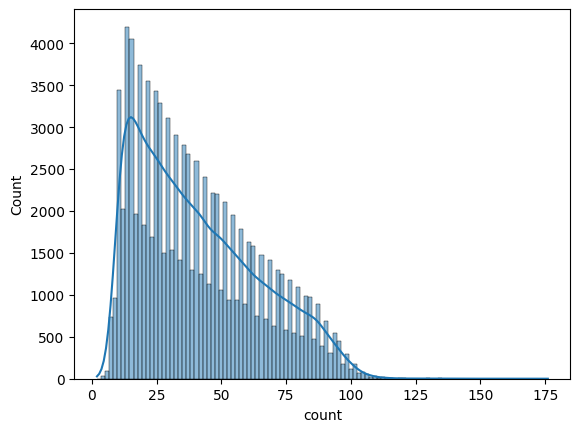

In [20]:
# we could see most review less than 100 words
import seaborn as sns
sns.histplot(lengthdata['count'],kde=True)

In [21]:
# set maxlength 100

maxlength = 100

padded = pad_sequences(sequence, padding='post', truncating='post', maxlen=maxlength)

In [22]:
# last word is 'listen'
corpus[0]

'sound track beautiful! paints senery mind well would recomend even people hate vid. game music! played game chrono cross games ever played best music! backs away crude keyboarding takes fresher step grate guitars soulful orchestras. would impress anyone cares listen! ^_^'

In [23]:
# check last word index not including zero padding
padded[0]

array([ 107,  385,  307,    1,    1,  320,   14,   10, 1538,   16,   42,
        593,    1,  138,   44,  422,  138,    1, 1713,  705,   50,  422,
         24,   44,    1,  166,    1,    1,  336,    1, 1024,    1, 2977,
          1,    1,   10,    1,   96, 2196,  234,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [24]:
# check 'listen' in word_index and confirm every word has been converted
word_index['listen']

234

In [25]:
# after padding length is the same
input_length = maxlength

In [26]:
from tensorflow.keras.layers import Embedding

In [27]:
embedding_model = tf.keras.models.Sequential()
embedding_model.add(Embedding(3000, 256, input_length=input_length))
embedding_model.compile('adam','mse')

In [28]:
output_array = embedding_model.predict(padded[0])
output_array

4/4 [==============================] - 0s 2ms/step


array([[ 0.0446929 , -0.03757887, -0.0411989 , ..., -0.03408549,
        -0.00572284,  0.02952768],
       [-0.00936391,  0.00595111,  0.02027272, ..., -0.04140089,
        -0.02053428, -0.03086202],
       [-0.03557016, -0.02479688,  0.00022863, ...,  0.03445513,
        -0.00592712,  0.02957698],
       ...,
       [ 0.00596881, -0.02017887, -0.03707203, ...,  0.00985511,
         0.02989575,  0.03799775],
       [ 0.00596881, -0.02017887, -0.03707203, ...,  0.00985511,
         0.02989575,  0.03799775],
       [ 0.00596881, -0.02017887, -0.03707203, ...,  0.00985511,
         0.02989575,  0.03799775]], dtype=float32)

In [29]:
# After padding every review has been converted to sentence with length 100
# After embedding every word has been converted to tensor with 128 dimensions
output_array.shape

(100, 256)

In [30]:
# begin training
# convert category into 1 or 0 for trainning
y = data_processed['Category']
y =[1 if item == 'Good' else 0 for item in data_processed['Category']]
y[:10]

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

In [31]:
# Split train and test data
x = padded
split = int(len(x)*0.8)
xtrain = x[:split]
xtest = x[split:]
ytrain = y[:split]
ytest = y[split:]

In [32]:
xtrain.shape

(76114, 100)

In [33]:
len(ytrain)

76114

In [34]:
# convert to tensor
xtrain = tf.convert_to_tensor(xtrain)
xtest = tf.convert_to_tensor(xtest)
ytrain = tf.convert_to_tensor(ytrain)
ytest = tf.convert_to_tensor(ytest)

In [35]:
tunning_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(3000,256, input_length=maxlength),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [36]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
tunning_model.compile(loss='binary_crossentropy', optimizer=optimizer)

# Train the model
history = tunning_model.fit(xtrain, ytrain,
                            batch_size=256,
                            epochs=100, callbacks=[lr_schedule])

Epoch 1/100
298/298 [==============================] - 21s 54ms/step - loss: 0.6933 - lr: 1.0000e-06
Epoch 2/100
298/298 [==============================] - 6s 21ms/step - loss: 0.6932 - lr: 1.1220e-06
Epoch 3/100
298/298 [==============================] - 5s 16ms/step - loss: 0.6930 - lr: 1.2589e-06
Epoch 4/100
298/298 [==============================] - 4s 13ms/step - loss: 0.6929 - lr: 1.4125e-06
Epoch 5/100
298/298 [==============================] - 4s 14ms/step - loss: 0.6926 - lr: 1.5849e-06
Epoch 6/100
298/298 [==============================] - 4s 12ms/step - loss: 0.6924 - lr: 1.7783e-06
Epoch 7/100
298/298 [==============================] - 4s 13ms/step - loss: 0.6921 - lr: 1.9953e-06
Epoch 8/100
298/298 [==============================] - 3s 12ms/step - loss: 0.6918 - lr: 2.2387e-06
Epoch 9/100
298/298 [==============================] - 4s 12ms/step - loss: 0.6915 - lr: 2.5119e-06
Epoch 10/100
298/298 [==============================] - 4s 12ms/step - loss: 0.6911 - lr: 2.8184e-0

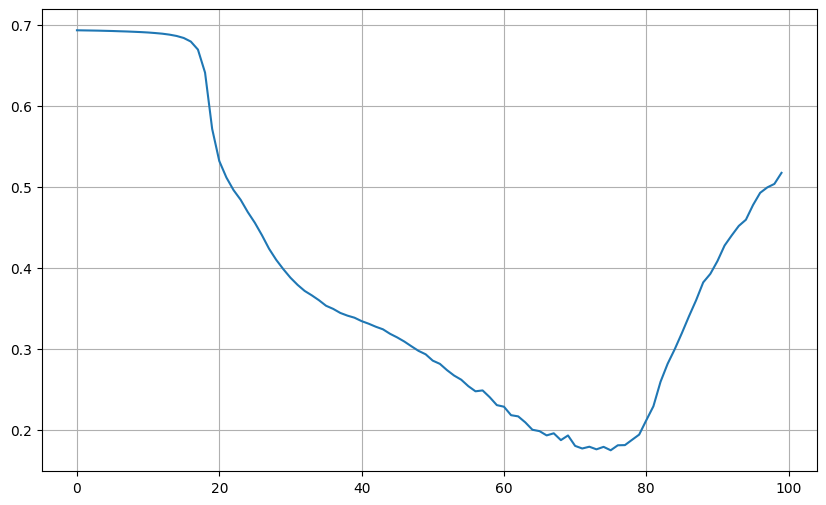

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

plt.grid(True)

sns.lineplot(history.history["loss"])
plt.show()

In [53]:
tf.keras.backend.clear_session()

train_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(3000,256, input_length=maxlength),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [54]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
train_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='mae')
train_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 256)          768000    
                                                                 
 dropout (Dropout)           (None, 100, 256)          0         
                                                                 
 bidirectional (Bidirection  (None, 64)                73984     
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 842049 (3.21 MB)
Trainable params: 842049 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [55]:
train_model.fit(xtrain, ytrain,
                batch_size=256,
                epochs=50,
                validation_split=0.2)

Epoch 1/50
238/238 [==============================] - 19s 65ms/step - loss: 0.4230 - mae: 0.2719 - val_loss: 0.3673 - val_mae: 0.2250
Epoch 2/50
238/238 [==============================] - 6s 26ms/step - loss: 0.3324 - mae: 0.2043 - val_loss: 0.3664 - val_mae: 0.2253
Epoch 3/50
238/238 [==============================] - 5s 20ms/step - loss: 0.2972 - mae: 0.1821 - val_loss: 0.3795 - val_mae: 0.2053
Epoch 4/50
238/238 [==============================] - 4s 16ms/step - loss: 0.2670 - mae: 0.1620 - val_loss: 0.3861 - val_mae: 0.2063
Epoch 5/50
238/238 [==============================] - 3s 14ms/step - loss: 0.2391 - mae: 0.1441 - val_loss: 0.4068 - val_mae: 0.2042
Epoch 6/50
238/238 [==============================] - 4s 16ms/step - loss: 0.2191 - mae: 0.1321 - val_loss: 0.4242 - val_mae: 0.2029
Epoch 7/50
238/238 [==============================] - 3s 14ms/step - loss: 0.1998 - mae: 0.1191 - val_loss: 0.4532 - val_mae: 0.1921
Epoch 8/50
238/238 [==============================] - 3s 15ms/step -

In [56]:
# use unseen data to do prediction
ypredict = train_model.predict(xtest)

595/595 [==============================] - 3s 5ms/step


In [57]:
ypredict = [0 if item<0.5 else 1 for item in ypredict ]
# ypredict = np.where(ypredict > 0.5, 1, 0)
ypredict[:10]

[0, 0, 0, 1, 0, 1, 1, 1, 1, 1]

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
accuracy = accuracy_score(ytest, ypredict)
print(f'Current model has {accuracy} accuracy against unseen data')

Current model has 0.8131798833359609 accuracy against unseen data


In [60]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      9304
           1       0.82      0.82      0.82      9725

    accuracy                           0.81     19029
   macro avg       0.81      0.81      0.81     19029
weighted avg       0.81      0.81      0.81     19029



<Axes: >

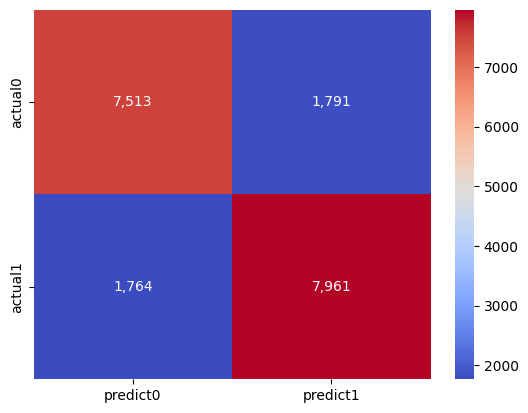

In [61]:
import seaborn as sns
cm = confusion_matrix(ytest, ypredict)
sns.heatmap(cm,annot=True,fmt=',',cmap='coolwarm',
            xticklabels=['predict0','predict1'],
            yticklabels=['actual0','actual1'])